### Smart Trash in Pittsburgh

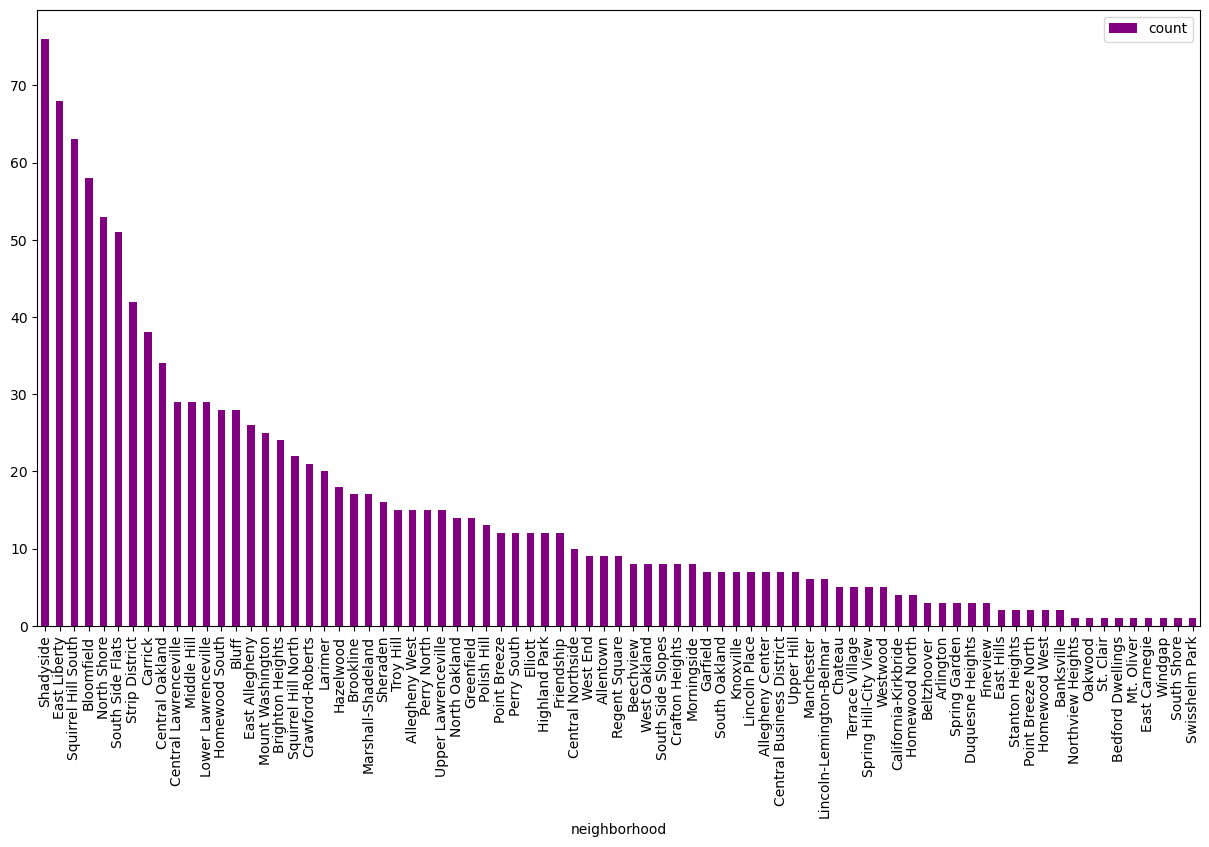

In [4]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

smart_trash_pandas = pd.read_csv("smart_trash_containers.csv")
smart_trash = smart_trash_pandas["neighborhood"].value_counts().sort_values(ascending=False)

smart_trash.plot(kind="bar", figsize=(15,8), color="purple")
plt.legend(bbox_to_anchor=(1,1))

neighborhoods = geopandas.read_file("Neighborhoods_.shp")

In [ ]:
Wa

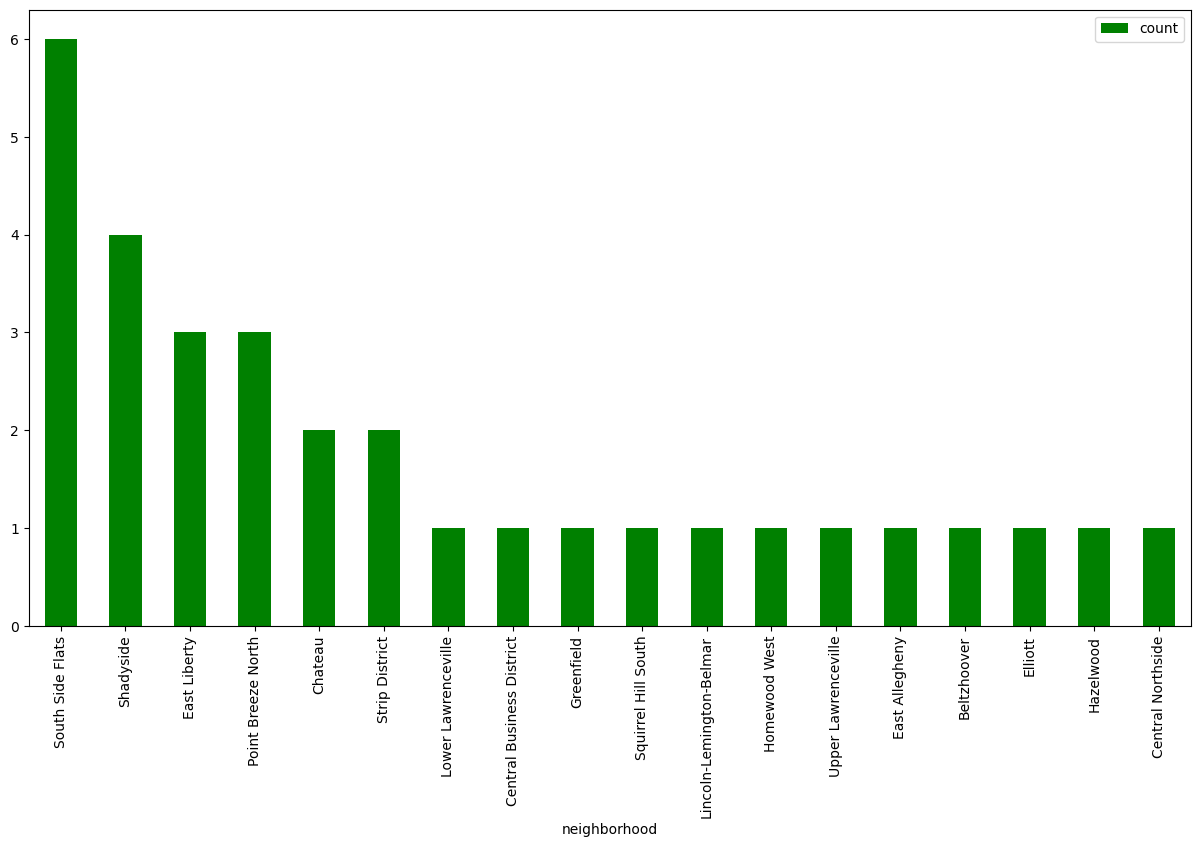

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

garb = pd.read_csv('waste_recovery_locations.csv') 
neighborhood_count = garb["neighborhood"].value_counts().sort_values(ascending=False)

neighborhood_count.plot(kind="bar", figsize=(15,8), color="green")
plt.legend(bbox_to_anchor=(1,1))